                 Neighborhood  Incidents     Rating
0              Outside County          1  99.487179
1               New Homestead          1  99.487179
2             Mt. Oliver Boro          1  99.487179
3                   St. Clair          2  98.974359
4               Regent Square          2  98.974359
..                        ...        ...        ...
89             Homewood North         77  60.512821
90               East Liberty         85  56.410256
91                    Carrick         99  49.230769
92           South Side Flats        108  44.615385
93  Central Business District        195   0.000000

[94 rows x 3 columns]


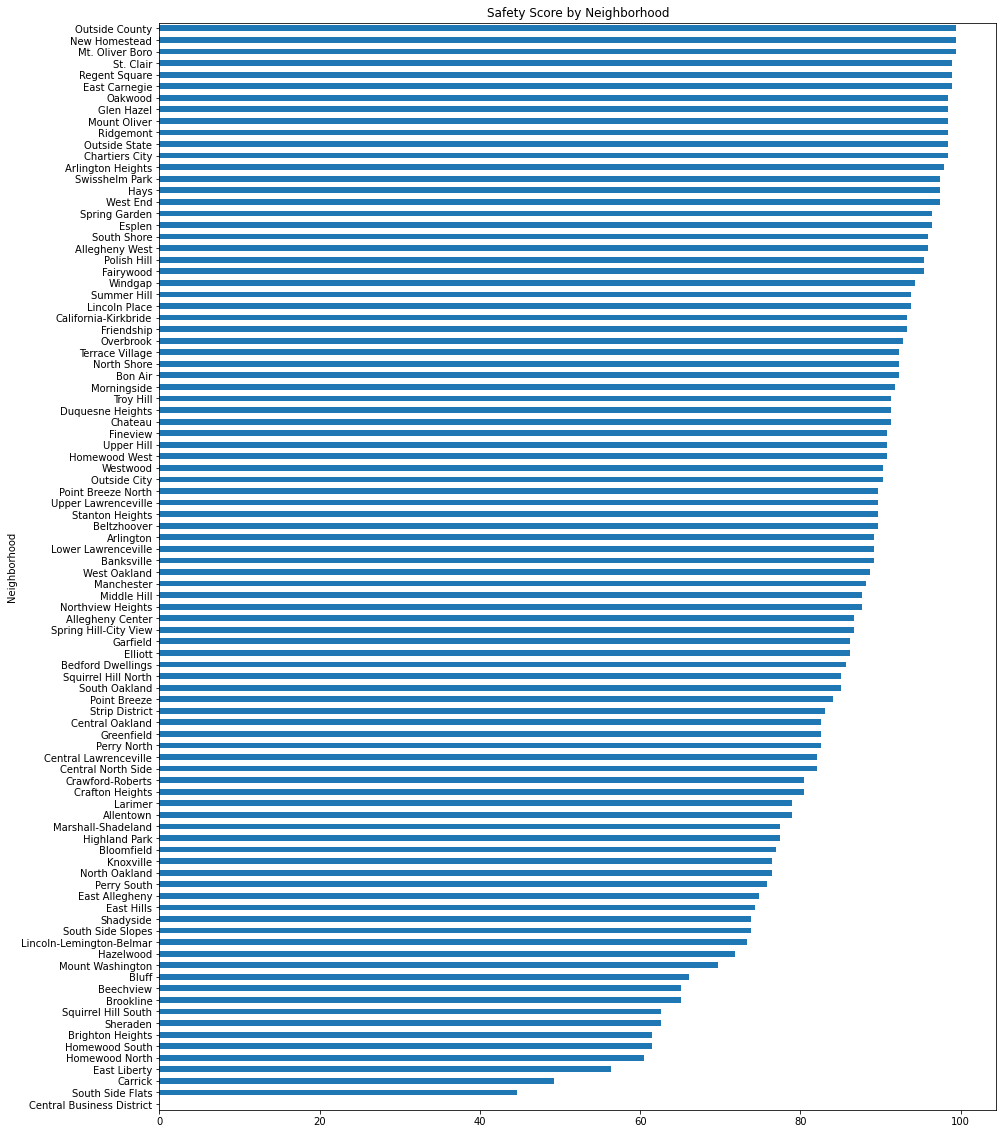

In [12]:
import pandas as pd
import numpy as np

# Parse CSV file
blotter_pandas = pd.read_csv("https://data.wprdc.org/datastore/dump/1797ead8-8262-41cc-9099-cbc8a161924b")

# Set default values for max and min incidents
min = 50
max = 50

# Create a new dictionary to populate with neighborhoods/incident counts
new_dict = {}

for i in range(len(blotter_pandas.index)):
# Check if neighborhood is not nan
    if pd.notna(blotter_pandas.iloc[i]["INCIDENTNEIGHBORHOOD"]):
# Check if neighborhood is already in dict, increment incidents if so, set to 1 if not
        if blotter_pandas.iloc[i]["INCIDENTNEIGHBORHOOD"] in new_dict:
            new_dict[blotter_pandas.iloc[i]["INCIDENTNEIGHBORHOOD"]] += 1
        else:
            new_dict[blotter_pandas.iloc[i]["INCIDENTNEIGHBORHOOD"]] = 1
            
# Check if new neighborhood incident count is fewer than min or greater than max and set values if so
        if new_dict[blotter_pandas.iloc[i]["INCIDENTNEIGHBORHOOD"]] < min:
            min = new_dict[blotter_pandas.iloc[i]["INCIDENTNEIGHBORHOOD"]]
        if new_dict[blotter_pandas.iloc[i]["INCIDENTNEIGHBORHOOD"]] > max:
            max = new_dict[blotter_pandas.iloc[i]["INCIDENTNEIGHBORHOOD"]]

# Create new lists for each of the three dataframe columns
colOne = []
colTwo = []
colThree = []

for i in new_dict:
# Iterate through the dictionary and populate each list with the appropriate data
    colOne.append(i)
    colTwo.append(new_dict[i])
# This line calculates Safety Score based on the given neighborhood's incident count and the maximum incident count
    colThree.append(100 - (100 * (new_dict[i] / max)))

# Generate data with column names and lists
data = {'Neighborhood': colOne,
        'Incidents': colTwo,
        'Rating': colThree
        }

# Create dataframe, sort rows by Safety Score descending, then reset the index
dataframe = pd.DataFrame(data)
dataframe = dataframe.sort_values(by=['Rating'], ascending=False)
dataframe = dataframe.reset_index(drop=True)

# New PD for Combined for combined metric
cheet = {"Neighborhood": dataframe.loc[:, "Neighborhood"] , "Rating": dataframe.loc[:, "Rating"]}
gfg = pd.DataFrame(cheet)
gfg = gfg.set_index('Neighborhood')

# Print the dataframe contents and plot the pertinent data
print(dataframe)
dataframe.loc[:, ['Neighborhood', 'Rating']].plot(kind='barh', figsize=(15,20), x='Neighborhood', title='Safety Score by Neighborhood', legend=False).invert_yaxis()

68.9
                       Travel_Miles      Rating
Neighborhood                                   
Squirrel Hill                  68.9  100.000000
Hill                           57.4   83.309144
Perry North                    36.0   52.249637
Highland Park                  35.9   52.104499
Shadyside                      33.9   49.201742
Homewood                       32.8   47.605225
Regent Square                  31.4   45.573295
Central Lawrenceville          26.6   38.606676
East Allegheny                 26.0   37.735849
Oakland                        25.4   36.865022
Manchester                     21.0   30.478955
Friendship                     20.6   29.898403
Lower Lawrenceville            19.7   28.592163
Garfield                       18.0   26.124819
Morning Side                   16.9   24.528302
Elliott                        14.2   20.609579
Carrick                         8.8   12.772134
South Hills                     8.5   12.336720
Point Breeze                    8.5

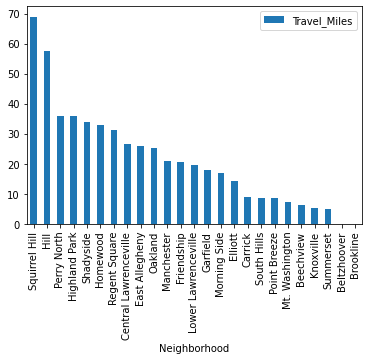

In [13]:
#Access Data Frane
street = pd.read_csv("https://data.wprdc.org/dataset/b882ba13-b01b-4a8e-a29f-5b2c0ef73566/resource/a5f3ae45-0716-4652-a85c-a69424f2f4f7/download/routestable.csv", index_col="Route Description", dtype={"id": int})

#Splice through the Travel Miles and add to my own data frame
streets = {"Travel_Miles": street.loc[:, "Travel Miles"]}
che = pd.DataFrame(streets)

#Group together Routes 
che = che.groupby("Route Description").sum()
#print(che)
ches = che.groupby(che.index.str.split().str[0]).Travel_Miles.sum().reset_index()

#Remaned Route Description to Neighborhood in Data Frame
ches2 = ches.rename({'Route Description': 'Neighborhood'}, axis=1)

#Editted names in Neighborhood index
ches3 =ches2.set_index('Neighborhood')
ches3.rename(index={"Central":'Central Lawrenceville',"East":'East Allegheny', "Elliott,": "Elliott", "Highland": "Highland Park", "Lower": "Lower Lawrenceville", "Morning": "Morning Side", "Mt": "Mt. Washington", "Perry": "Perry North", "Point": "Point Breeze", "Regent": "Regent Square", "South": "South Hills", "Squirrel": "Squirrel Hill"}, inplace=True)


# Visualization here
ches3 = ches3.sort_values(by=['Travel_Miles'], ascending=False)
ches3.plot(kind="bar")

# Metric...
# Find the max of data set...
column = ches3["Travel_Miles"]
max_value = column.max()
print(max_value)

# create a new column and solve for rating...
ches3['Rating'] = ((ches3["Travel_Miles"] * 100).div(max_value))

# New PD for combined metric
cheetos = {"Rating": ches3.loc[:, "Rating"]}
fg = pd.DataFrame(cheetos)

print(ches3) 



/opt/tljh/user/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


                     Quantity      Rating
Neighborhood                             
Squirrel Hill South      5073  100.000000
Highland Park            2941   57.973586
Squirrel Hill North      2083   41.060516
South Side Flats         1693   33.372758
Shadyside                1558   30.711610
...                       ...         ...
Arlington Heights           5    0.098561
Esplen                      3    0.059137
Glen Hazel                  2    0.039424
South Shore                 2    0.039424
Hays                        1    0.019712

[90 rows x 2 columns]
AxesSubplot(0.125,0.125;0.775x0.755)


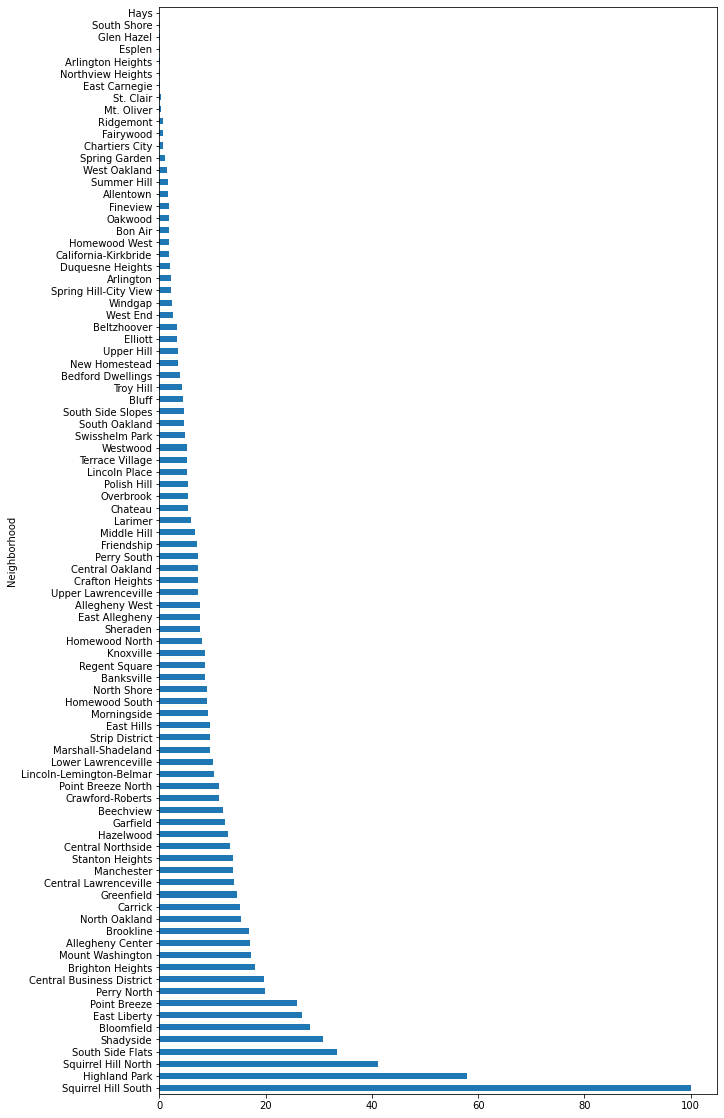

In [14]:
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

pittsTree = pd.read_csv("https://data.wprdc.org/datastore/dump/1515a93c-73e3-4425-9b35-1cd11b2196da", index_col="id", dtype={"id": int})

Quantity = []

trees = {"Neighborhood": pittsTree.loc[:, "neighborhood"]}
df = pd.DataFrame(trees)

for value in df["Neighborhood"]:
    Quantity.append(1)

df["Quantity"] = Quantity

cheese = df.groupby("Neighborhood").sum()



maxVal = cheese.max()

cheese = cheese.sort_values(by=['Quantity'], ascending=False)

cheese["Rating"] = (cheese['Quantity'] / 5073 * 100)

cheeto = {"Rating": cheese.loc[:, "Rating"]}
gf = pd.DataFrame(cheeto)

print(cheese)
print(gf.plot(kind='barh', figsize=(10,20), legend=False))

In [ ]:
# Combined Metric
nugget =pd.concat([gf,fg, gfg], axis=0)
nug = nugget.groupby("Neighborhood").mean()
nugs = nug.sort_values(by=['Rating'], ascending=False)

# Get rid of redundant neighborhoods
nuggs = nugs.drop(['Mt. Oliver', "Mount Oliver", "Outside City", "Outside State"])

# Print out Dataframe and Visualization
print(nuggs)
print(nuggs.plot(kind='barh', figsize=(13,20), legend=False))

**Conclusions:**<br>
John Segebart: I am not surprised to see Squirrel Hill winning the title of best neighborhood. They had such a big lead in my trees dataset where it was basically an outlier. It is nice to see that neighborhoods that do not revolve around parks such as Outside County and Mt. Oliver Boro get really close to Squirrel Hill though. It is pretty interesting that all of our visualization for our own datasets and combined datasets exhibit a logarithmic curve. It made sense for my personal set since neighborhoods that are based parks (Pittsburgh having very few of them) are going to have way more trees then urban areas. My dataset was very prone to outliers in this case and apparently so were the other datasets. <br>

Garrett DiCenzo: Squirrel Hill was a rather surprising winner of the best neighborhood. Looking at my dataset, which looked at the number of police incidents in the past 30 days in each neighborhood, Squirrel Hill North is just barely making it past the 80 mark, and Squirrel Hill South, being one of the worst performing neighborhoods, has a Safety Score of just above 60. However, looking at the other two datasets, Squirrel Hill is placed in the higher end of the spectrum, which would indeed make it a very good neighborhood despite the results from my dataset.<br>

Eva Frankovic: